<span style='color:Black'>
<div class="alert alert-info">
    <h1 align="center"> Explainable AI - SHAP </h1> 
    <h3 align="center" style='color:black'> International Graduate School of Artificial Intelligence - YunTech </h3>
    <h5 align="center">  </h5>
</div>
</span>

### <span style='color:Black'>**Motivation** </span>

Imagine you are trying to train a machine learning model to predict whether a specific person will click on an ad. After receiving some data about that person, the model predicts that they will not click on the ad.

<p align="center">
    <img src='./imgs/pic1.png' width = '40%'>
</p>

But what factors led to this prediction? How much does each feature contribute to the prediction? Wouldn’t it be nice if you can see a plot indicating how much each feature contributes to the prediction like below?

<p align="center">
    <img src='./imgs/pic2.png' width = '40%'>
</p>


#### That is when Shapley value comes in handy.

### <span style='color:Black'>**What is Shapley Value?** </span>
The Shapley value is a method used in game theory that involves fairly distributing both gains and costs to actors working in a coalition.

Since each actor contributes differently to the coalition, the Shapley value makes sure that each actor **gets a fair share depending on how much they contribute.**

<p align="center">
    <img src='./imgs/pic2.png' width = '40%'>
</p>


### A Simple Example

Shapley value is used for a wide range of problems that question the contribution of each worker/feature in a group. To understand how Shapley value works, let’s imagine that your company has just done A/B testing, where they test different combinations of advertisement strategies.

The revenues for each strategy in a specific month are:

- no ad: $150
- social media: $300
- Google advertisement: $200
- email marketing: $350
- social media and Google advertisement $320
- social media and email marketing: $400
- Google advertisement and email marketing: $350
- email marketing, Google advertisement, and social media: $450

<p align="center">
    <img src='./imgs/pic4.png' width = '30%'>
</p>

The difference in revenues between using three ads and using no ads is $300. How much does each ad contribute to this difference?

<p align="center">
    <img src='./imgs/pic5.png' width = '30%'>
</p>

# Find the Total Contribution 

<p align="center">
    <img src='./imgs/pic6.png' width = '40%'>
</p>

You can see more details here: https://mathdatasimplified.com/2023/05/20/shap-explain-any-machine-learning-model-in-python-4/

## <span style='color:Black'>SHAP — Explain Any Machine Learning Models in Python </span>

SHAP is a Python library that uses Shapley values to explain the output of any machine learning model.

<span style='color:red'> Please install the below packages </span>

In [8]:
#!pip install shap==0.39.0 patsy==0.5.2 yellowbrick==1.2.1 xgboost==1.4.2 numpy==1.20

# Machine Learning Interpretability With Shap

## Train Model

In [9]:
import pandas as pd

data = pd.read_csv("./Data/advertising.csv")
data.columns = data.columns.map(lambda row: "_".join(row.lower().split(" ")))
data.head(10)

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [10]:
from patsy import dmatrices

y, X = dmatrices(
    "clicked_on_ad ~ daily_time_spent_on_site + age + area_income + daily_internet_usage  + male -1",
    data=data,
)

In [11]:
X_frame = pd.DataFrame(data=X, columns=X.design_info.column_names)
X_frame

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male
0,68.95,35.0,61833.90,256.09,0.0
1,80.23,31.0,68441.85,193.77,1.0
2,69.47,26.0,59785.94,236.50,0.0
3,74.15,29.0,54806.18,245.89,1.0
4,68.37,35.0,73889.99,225.58,0.0
...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,1.0
996,51.30,45.0,67782.17,134.42,1.0
997,51.63,51.0,42415.72,120.37,1.0
998,55.55,19.0,41920.79,187.95,0.0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### XGBoost classifier

<p align="center">
    <img src='./imgs/xgboost.jpg' width = '40%'>
</p>

In [28]:
import xgboost
import shap
from sklearn.metrics import accuracy_score

model = xgboost.XGBClassifier().fit(X_train, y_train)

prediction = model.predict(X_test)
f1 = accuracy_score(y_test, prediction)
f1

0.96

## SHAP Summary Plot

In [14]:
explainer = shap.Explainer(model)
shap_values = explainer(X_frame)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


## SHAP Waterfall Plot

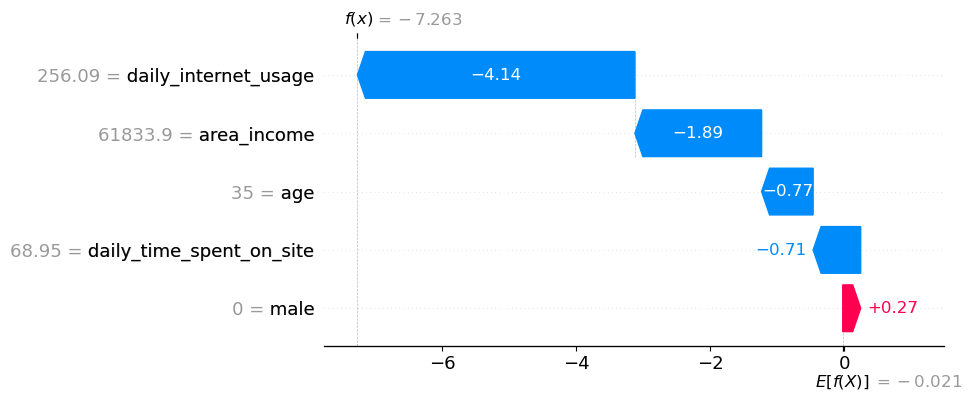

In [16]:
shap.plots.waterfall(shap_values[0])

- The blue bar shows how much a particular feature decreases the value of the prediction.

- The red bar shows how much a particular feature increases the value of the prediction.

- Negative values imply probabilities of less than 0.5 that the person clicked the ad




$f(x)$ is the prediction after considering all features

$E[f(x)]$ is the mean prediction

$$f(x) - E[f(x)] = -7.263 - (-0.021) = -7.24$$
$$\text{total contribution} = -4.14 - 1.89 - 0.77 - 0.71 + 0.27=-7.24$$

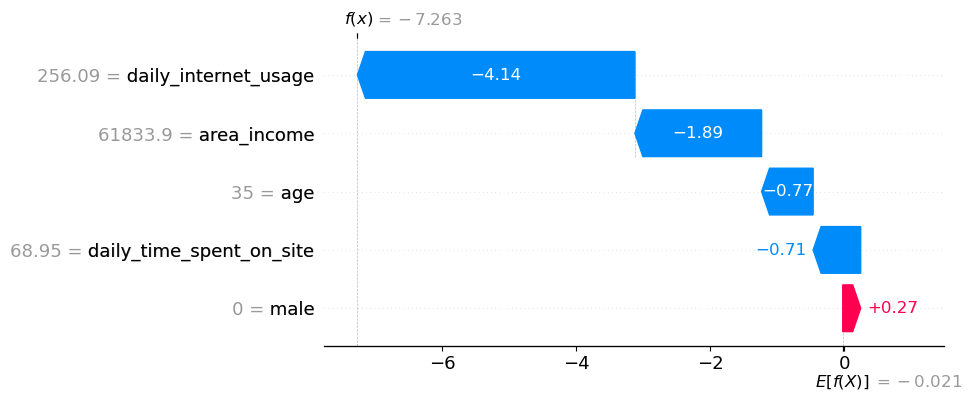

In [29]:
shap.plots.waterfall(shap_values[0])

### SHAP Summary Plot

Instead of looking at each individual instance, we can visualize the overall impact of these features across multiple instances using SHAP summary plot:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


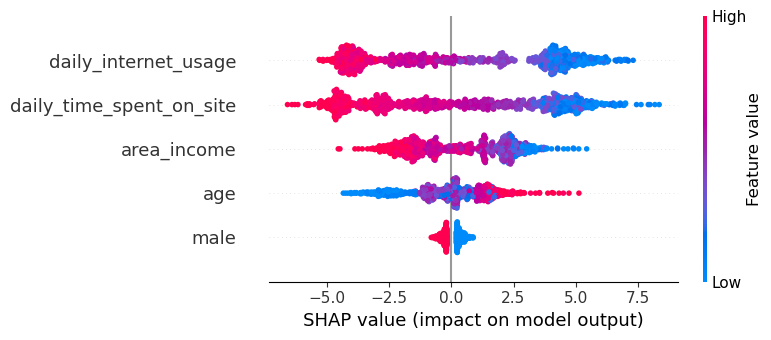

In [15]:
shap.summary_plot(shap_values, X)

The SHAP summary plot tells us the most important features and their range of effects over the dataset.

From the plot above, we can gain some interesting insights into the model’s predictions:

- The daily internet usage of a user has the strongest effect on whether that user clicked on an ad.

- As the **daily internet usage increases**, a user is **less likely** to click on an ad.

- As the **daily time spent on the site increases**, a user is **less likely** to click on an ad.

- As the area income increases, a user is **less likely** to click on an ad.

- As the **age increases**, a user is **more likely** to click on an ad.

- If a user is **a male**, that user is **less likely** to click on an ad.

### SHAP Scatter Plot

We can observe the effect of a single feature on all predictions made by the model using the SHAP dependence scatter plot.

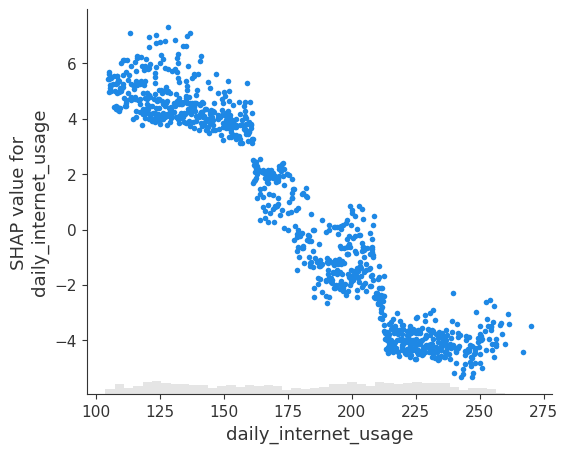

In [19]:
shap.plots.scatter(shap_values[:, "daily_internet_usage"])

From the plot above, we can see that as the daily internet usage increases, the SHAP value for the daily internet usage decreases. This confirms what we saw in the earlier plot.



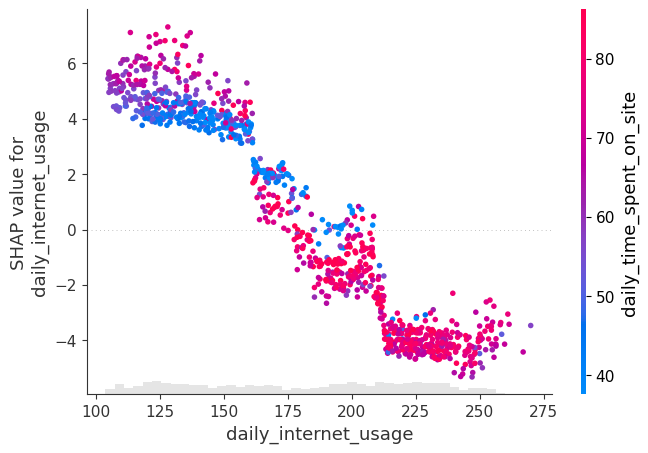

In [20]:
shap.plots.scatter(shap_values[:, "daily_internet_usage"], color=shap_values)

From the plot above, we can see that a person who uses the internet for 150 minutes per day and spends a small amount of time on the website per day is more likely to click the ad.

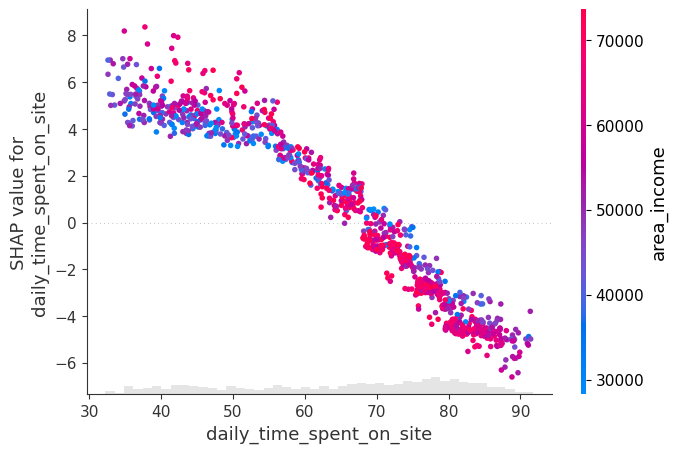

In [21]:
shap.plots.scatter(shap_values[:, "daily_time_spent_on_site"], color=shap_values)

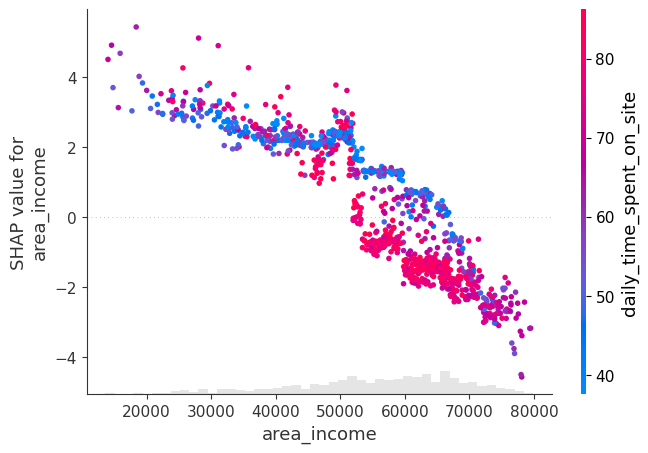

In [22]:
shap.plots.scatter(shap_values[:, "area_income"], color=shap_values)

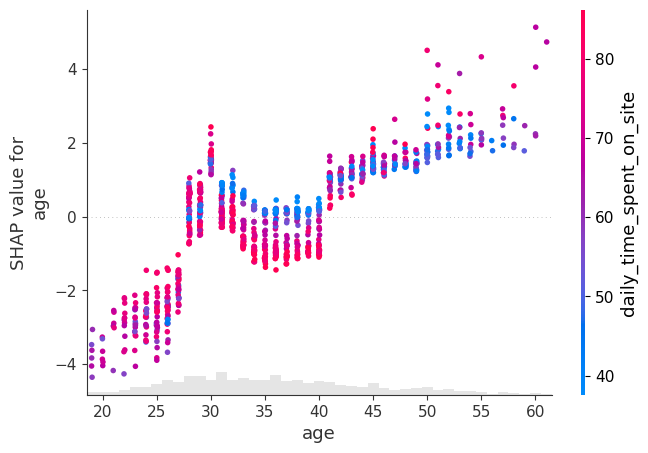

In [23]:
shap.plots.scatter(shap_values[:, "age"], color=shap_values)

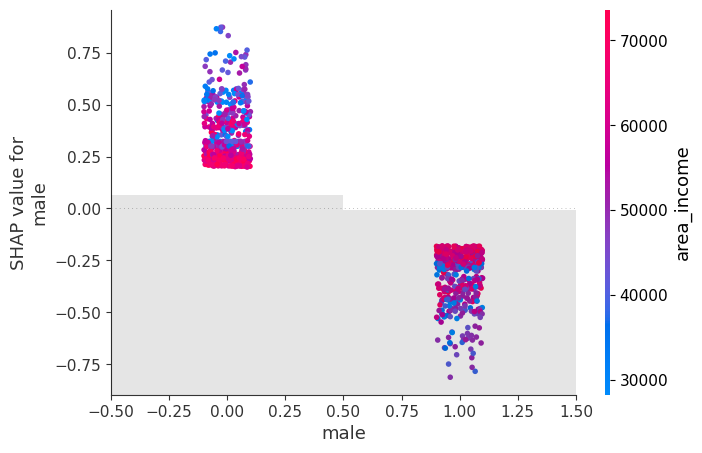

In [24]:
shap.plots.scatter(shap_values[:, "male"], color=shap_values)

<div style="font-size: 1em; margin: 1em 1em 1em 1em; border: 1px solid #86989B; background-color: #8fffff;padding: 1em 1em 1em 1em; ">
<div align="center">

<h2 style="text-align: center;color: Darkgreen"> Thank you</h2>


</div>